## FFT-Based Seizure Visualisation  

- This notebook processes OSDB raw acceleration data using the **Fast Fourier Transform (FFT)**. 
- This notebook demonstrates how to process OSDB accelerometer data using FFT to visualise frequency patterns in the 3-8 Hz range.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import json

# Load the JSON file
file_path = '../../tests/testData/testDataVisualisation.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    raw_json = json.load(file)

In [3]:
# Flatten the JSON and extract relevant fields
flattened_data = []

for attribute in raw_json:
    user_id = attribute.get('userId', None)
    datapoints = attribute.get('datapoints', [])

    for point in datapoints:
        event_id = point.get('eventId', None)
        hr = point.get('hr', [])
        o2Sat = point.get('o2Sat', [])
        rawData = point.get('rawData', [])
        rawData3D = point.get('rawData3D', [])
        # Append every datapoint as a row
        flattened_data.append({
            'eventId': event_id,
            'userId': user_id,
            'hr': hr,
            'o2Sat': o2Sat,
            'rawData': rawData,
            'rawData3D': rawData3D,

        })
        
# Create a DataFrame
df_sensordata = pd.DataFrame(flattened_data)

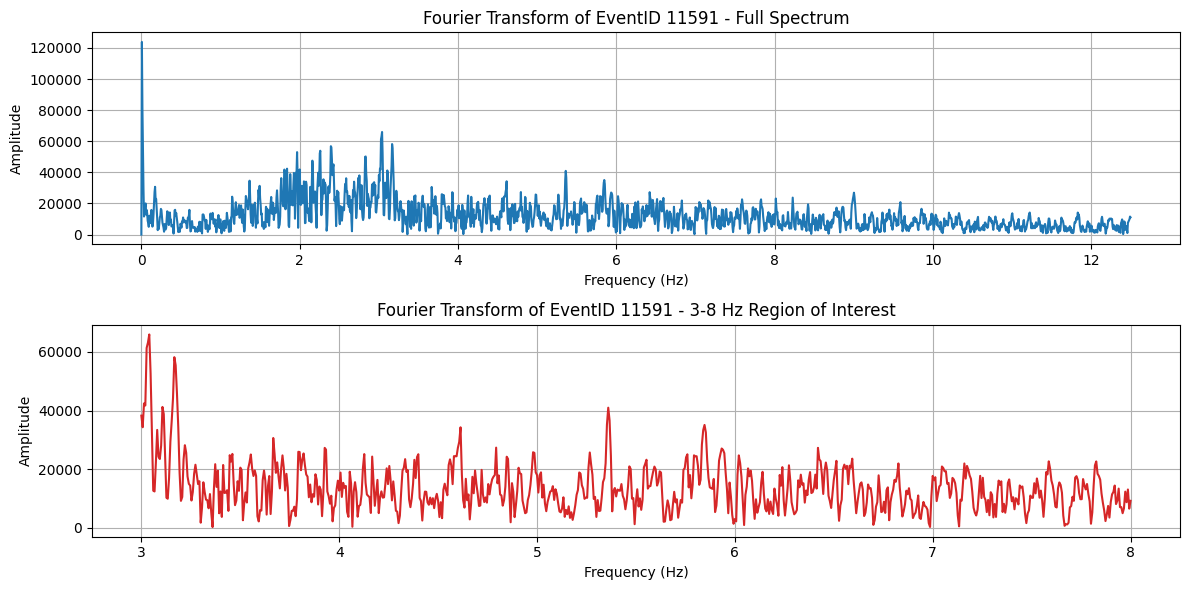

In [4]:
# Filter rows for eventId
event_id = 11591
filtered_data = df_sensordata[df_sensordata['eventId'] == event_id]

# Sampling frequency (25 Hz)
sampling_rate = 25  # in Hz

# FFT for each 5-second window (each row has 125 samples)
n_samples_per_row = 125  # Each row contains 125 samples (5 seconds * 25 Hz)
n_rows = len(filtered_data)

# Flatten the rawData column for all rows
raw_data = np.hstack(filtered_data['rawData'].values)

# Remove the DC component (mean of the signal)
raw_data = raw_data - np.mean(raw_data)

# Compute the Fourier Transform (FFT) for the entire signal
fft_result = np.fft.fft(raw_data)

# Compute the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(raw_data), d=1/sampling_rate)

# Compute the magnitude of the FFT (absolute value)
fft_magnitude = np.abs(fft_result)

# Only consider the positive frequencies (the FFT is symmetric)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_fft_magnitude = fft_magnitude[:len(frequencies)//2]

# Select the range of frequencies from 3 to 8 Hz (ROI)
roi_start = 3  # 3 Hz
roi_end = 8    # 8 Hz

# Find indices of the ROI frequencies
roi_indices = np.where((positive_frequencies >= roi_start) & (positive_frequencies <= roi_end))[0]

# Plot the FFT for the full spectrum and zoom into the 3-8 Hz region
plt.figure(figsize=(12, 6))

# Full spectrum plot
plt.subplot(2, 1, 1)
plt.plot(positive_frequencies, positive_fft_magnitude, color='tab:blue')
plt.title(f"Fourier Transform of EventID {event_id} - Full Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

# Zoomed-in plot (3-8 Hz region)
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies[roi_indices], positive_fft_magnitude[roi_indices], color='tab:red')
plt.title(f"Fourier Transform of EventID {event_id} - 3-8 Hz Region of Interest")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()



# 🚀 Workflow

## 1. Data Preparation  
The sensor data is filtered for a specific event, identified by an `eventId`. Each event contains multiple rows of time-series data. In this analysis, each row consists of **125 samples**, representing **5 seconds** of sensor data at a sampling frequency of **25 Hz**. The raw sensor data is extracted and flattened into a continuous signal. To remove any signal offset, the **DC component** (mean of the signal) is subtracted.

---

## 2. Fourier Transform (FFT)  
The **Fast Fourier Transform (FFT)** is applied to the prepared signal to convert it from the **time domain** into the **frequency domain**. This transformation reveals the signal's frequency components and their corresponding magnitudes. The FFT result is symmetric, so only the **positive frequencies** are considered for this plot.

> 💡 **Tip:** The FFT allows us to analyse the signal's frequency content, which is essential for identifying patterns related to seizure events.

---

## 3. Frequency of Interest: 3-8 Hz  
The analysis focuses on the **3-8 Hz frequency band**, which is often linked to seizure activity in accelerometer data. Frequencies within this range are extracted, and their magnitudes are isolated for further inspection.

---

## 4. Visualisation  
The frequency components of the signal are visualised using two plots:  

- **Full Spectrum Plot**: Displays all positive frequency components of the signal to provide a complete overview.  
- **3-8 Hz Region of Interest**: Highlights the critical frequency band for seizure detection, making it easier to observe patterns and magnitudes within this range.

---

# 🔍 How It Works  
- The signal is **prepared** by flattening and removing any DC bias.  
- The **FFT** transforms the signal into its frequency components, allowing spectral analysis.  
- The **3-8 Hz frequency range** is isolated as the region of interest for detecting seizure-related oscillations.  
- The results are **visualised** to provide insights into the signal's frequency content.  

---

# 👤 Author  
Developed by **Jamie Pordoy**.
